## Forecasting project

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [31]:
from pathlib import Path
import os 
current_dir = os.getcwd()
data_path = current_dir.replace("notebooks", "data")
data_path = data_path + "\Dataset.csv"
print(data_path)

c:\MyFiles\PeakHackathon\data\Dataset.csv


I had some errors with loading the csv (probably of some German character), so I want to see what encoding I should use to make it work.

In [32]:
import chardet

# Read the file in binary mode
with open(data_path, 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])

Windows-1252


## Data familarization

In [61]:
df = pd.read_csv(data_path, encoding='Windows-1252')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         32484 non-null  object 
 1   Order ID       32484 non-null  object 
 2   Order Date     32484 non-null  object 
 3   Ship Date      32484 non-null  object 
 4   Ship Mode      32484 non-null  object 
 5   Customer ID    32484 non-null  object 
 6   Customer Name  32484 non-null  object 
 7   Segment        32484 non-null  object 
 8   Country        32484 non-null  object 
 9   City           32484 non-null  object 
 10  State          32484 non-null  object 
 11  Postal Code    32482 non-null  object 
 12  Region         32484 non-null  object 
 13  Product ID     32484 non-null  object 
 14  Category       32484 non-null  object 
 15  Sub-Category   32484 non-null  object 
 16  Product Name   32484 non-null  object 
 17  Sales          32484 non-null  float64
 18  Quanti

In [63]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [64]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,#NAME?,US-2019-103800,03/01/2019,07/01/2019,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,#NAME?,US-2019-112326,04/01/2019,08/01/2019,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,#NAME?,US-2019-112326,04/01/2019,08/01/2019,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,#NAME?,US-2019-112326,04/01/2019,08/01/2019,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,#NAME?,US-2019-141817,05/01/2019,12/01/2019,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [65]:
df = df.drop("Row ID", axis=1)

In [66]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       32484 non-null  object 
 1   Order Date     32484 non-null  object 
 2   Ship Date      32484 non-null  object 
 3   Ship Mode      32484 non-null  object 
 4   Customer ID    32484 non-null  object 
 5   Customer Name  32484 non-null  object 
 6   Segment        32484 non-null  object 
 7   Country        32484 non-null  object 
 8   City           32484 non-null  object 
 9   State          32484 non-null  object 
 10  Postal Code    32482 non-null  object 
 11  Region         32484 non-null  object 
 12  Product ID     32484 non-null  object 
 13  Category       32484 non-null  object 
 14  Sub-Category   32484 non-null  object 
 15  Product Name   32484 non-null  object 
 16  Sales          32484 non-null  float64
 17  Quantity       32484 non-null  int64  
 18  Discou

In [68]:
for c in df.columns:
    try:
        df[c] = df[c].astype(float)
    except:
        print(f"Could not convert {c} to numeric")
        try:
                df[c] = pd.to_datetime(df[c])
        except:
            print(f"Could not convert {c} to date time")
    
        

Could not convert Order ID to numeric
Could not convert Order ID to date time
Could not convert Order Date to numeric
Could not convert Order Date to date time
Could not convert Ship Date to numeric
Could not convert Ship Date to date time
Could not convert Ship Mode to numeric
Could not convert Ship Mode to date time
Could not convert Customer ID to numeric
Could not convert Customer ID to date time
Could not convert Customer Name to numeric
Could not convert Customer Name to date time
Could not convert Segment to numeric
Could not convert Segment to date time
Could not convert Country to numeric
Could not convert Country to date time
Could not convert City to numeric
Could not convert City to date time
Could not convert State to numeric
Could not convert State to date time
Could not convert Postal Code to numeric
Could not convert Postal Code to date time
Could not convert Region to numeric
Could not convert Region to date time
Could not convert Product ID to numeric
Could not conver

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       32484 non-null  object 
 1   Order Date     32484 non-null  object 
 2   Ship Date      32484 non-null  object 
 3   Ship Mode      32484 non-null  object 
 4   Customer ID    32484 non-null  object 
 5   Customer Name  32484 non-null  object 
 6   Segment        32484 non-null  object 
 7   Country        32484 non-null  object 
 8   City           32484 non-null  object 
 9   State          32484 non-null  object 
 10  Postal Code    32482 non-null  object 
 11  Region         32484 non-null  object 
 12  Product ID     32484 non-null  object 
 13  Category       32484 non-null  object 
 14  Sub-Category   32484 non-null  object 
 15  Product Name   32484 non-null  object 
 16  Sales          32484 non-null  float64
 17  Quantity       32484 non-null  float64
 18  Discou

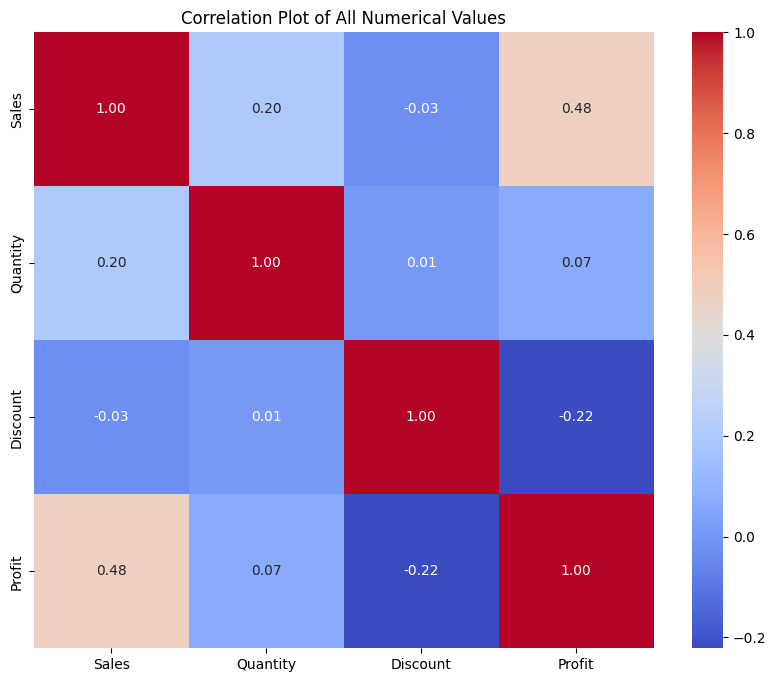

In [70]:
numerical_data = df.select_dtypes(include='number')
correlation_matrix = numerical_data.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of All Numerical Values')
plt.show()

In [74]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      2
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [72]:
# Find rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Display rows with missing values
print("Rows with missing values:")
print(rows_with_missing_values)

Rows with missing values:
             Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
31527  CA-2018-162887  07/11/2018  09/11/2018    Second Class    SV-20785   
32428  CA-2018-117086  08/11/2018  12/11/2018  Standard Class    QJ-19255   

          Customer Name    Segment        Country        City    State  \
31527  Stewart Visinsky   Consumer  United States  Burlington  Vermont   
32428      Quincy Jones  Corporate  United States  Burlington  Vermont   

      Postal Code Region       Product ID   Category Sub-Category  \
31527         NaN   East  FUR-CH-10000595  Furniture       Chairs   
32428         NaN   East  FUR-BO-10004834  Furniture    Bookcases   

                                            Product Name   Sales  Quantity  \
31527                    Safco Contoured Stacking Chairs   715.2       3.0   
32428  Riverside Palais Royal Lawyers Bookcase, Royal...  4404.9       5.0   

       Discount    Profit  
31527       0.0   178.800  
32428       0.0  101

## missing values

only rows 31527 and 32428 have missing values (Postal code). It may affect the grouping by postal codes.

In [73]:
specific_row = df.iloc[31527]
print(specific_row)

Order ID                          CA-2018-162887
Order Date                            07/11/2018
Ship Date                             09/11/2018
Ship Mode                           Second Class
Customer ID                             SV-20785
Customer Name                   Stewart Visinsky
Segment                                 Consumer
Country                            United States
City                                  Burlington
State                                    Vermont
Postal Code                                  NaN
Region                                      East
Product ID                       FUR-CH-10000595
Category                               Furniture
Sub-Category                              Chairs
Product Name     Safco Contoured Stacking Chairs
Sales                                      715.2
Quantity                                     3.0
Discount                                     0.0
Profit                                     178.8
Name: 31527, dtype: 

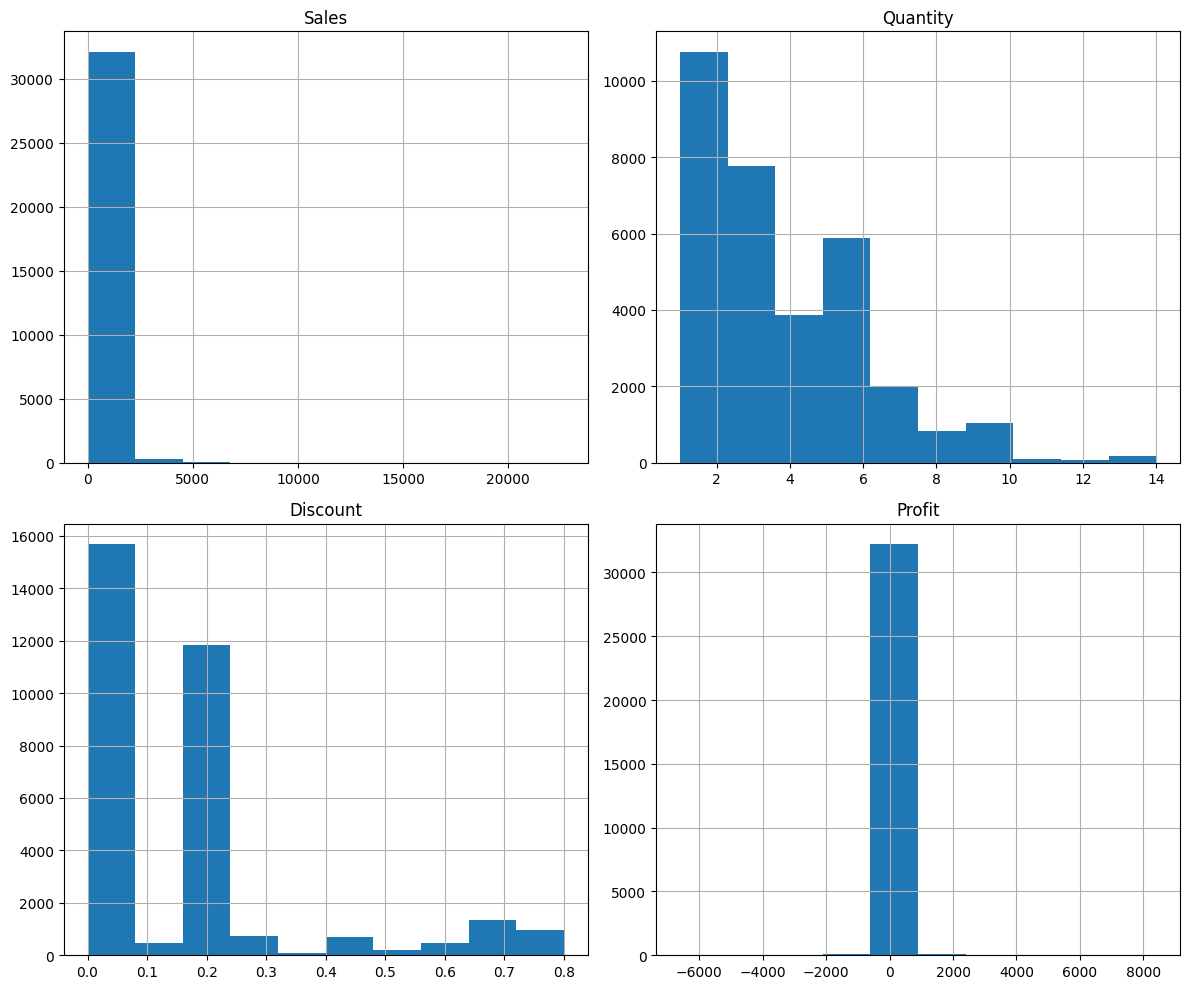

In [76]:
# Plot histograms of each column
df.hist(figsize=(12, 10))
plt.tight_layout()

plt.show()

## Counting values
Now the values are counted 

In [117]:
# Show all unique values in each column
def unique_values_dataframe(df):
    unique_values_count = []

    for column in df.columns:
        unique_values_count.append(df[column].value_counts())

    final_list = []
    for a in unique_values_count:
        temp = []
        values = a.index.tolist()
        counts = a.values.tolist()
        for i in range(len(values)):
            temp.append([values[i],counts[i]])
        final_list.append(temp)
        
    return final_list

Show how many unique values there are

In [119]:
unique_values_count = unique_values_dataframe(df)
for i in range(len(unique_values_count)):
    print(df.columns[i], ":", len(unique_values_count[i]))

Order ID : 16259
Order Date : 3486
Ship Date : 3716
Ship Mode : 4
Customer ID : 804
Customer Name : 800
Segment : 3
Country : 2
City : 542
State : 59
Postal Code : 706
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1853
Sales : 5837
Quantity : 14
Discount : 12
Profit : 7334


In [122]:
selected_columns = ['Segment', 'Country', 'City', 'State', 'Sub-Category', 'Product Name']  # Replace with your desired column names
selected_data = df[selected_columns]
print(selected_data.head())
selected_unique_values = unique_values_dataframe(selected_data)

       Segment        Country          City         State Sub-Category  \
0     Consumer  United States       Houston         Texas        Paper   
1  Home Office  United States    Naperville      Illinois      Binders   
2  Home Office  United States    Naperville      Illinois       Labels   
3  Home Office  United States    Naperville      Illinois      Storage   
4     Consumer  United States  Philadelphia  Pennsylvania          Art   

                                        Product Name  
0  Message Book, Wirebound, Four 5 1/2" X 4" Form...  
1         GBC Standard Plastic Binding Systems Combs  
2                                          Avery 508  
3                      SAFCO Boltless Steel Shelving  
4  Avery Hi-Liter EverBold Pen Style Fluorescent ...  


           Segment        Country          City         State Sub-Category  \
0         Consumer  United States       Houston         Texas        Paper   
1      Home Office  United States    Naperville      Illinois      Binders   
2      Home Office  United States    Naperville      Illinois       Labels   
3      Home Office  United States    Naperville      Illinois      Storage   
4         Consumer  United States  Philadelphia  Pennsylvania          Art   
...            ...            ...           ...           ...          ...   
32479  Home Office  United States        Smyrna       Georgia      Binders   
32480  Home Office  United States        Smyrna       Georgia          Art   
32481     Consumer  United States     Lafayette     Louisiana       Tables   
32482     Consumer  United States    Long Beach      New York       Labels   
32483     Consumer  United States    Long Beach      New York     Supplies   

                                            Product Name  
0   

In [124]:
for i in range(len(selected_unique_values)):
    print(selected_data.columns[i], ":", len(selected_unique_values[i]))

Segment : 3
Country : 2
City : 542
State : 59
Sub-Category : 17
Product Name : 1853
